<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/RNNAir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, usecols=[1], engine='python')

# Normalizar el dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

# Dividir en conjuntos de entrenamiento y prueba
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Preparar los datos de entrada y salida
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [3]:
# Crear y ajustar el modelo RNN
model = Sequential()
model.add(SimpleRNN(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - loss: 0.0021 - 1s/epoch - 12ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0020 - 136ms/epoch - 1ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0021 - 151ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0021 - 145ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0020 - 148ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0020 - 132ms/epoch - 1ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0021 - 148ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0021 - 135ms/epoch - 1ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0020 - 140ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0021 - 136ms/epoch - 1ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0020 - 139ms/epoch - 1ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0020 - 137ms/epoch - 1ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0020 - 143ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0021 - 153ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0021 - 136ms/epoch - 1ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0019 - 131ms/epoc

In [4]:
# Hacer predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir predicciones
train_predict = scaler.inverse_transform(train_predict)
train_Y_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
test_Y_inv = scaler.inverse_transform([y_test])

# Calcular el error cuadrático medio
train_score = np.sqrt(mean_squared_error(train_Y_inv[0], train_predict[:,0]))
print('Puntaje de Entrenamiento: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(test_Y_inv[0], test_predict[:,0]))
print('Puntaje de Prueba: %.2f RMSE' % (test_score))

2/2 [==============================] - 0s 10ms/step
Puntaje de Entrenamiento: 23.21 RMSE
Puntaje de Prueba: 59.09 RMSE


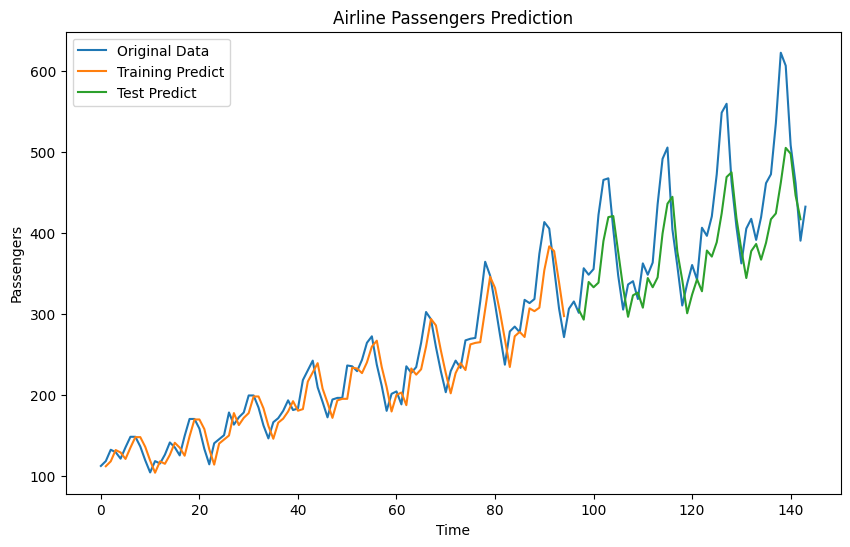

In [5]:
# Graficar los resultados
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dataset)-1, :] = test_predict

plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(trainPredictPlot, label='Training Predict')
plt.plot(testPredictPlot, label='Test Predict')
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.title("Airline Passengers Prediction")
plt.legend()
plt.show()